In [1]:
run ./RNA_simulation.py

In [2]:
%matplotlib inline
%load_ext rpy2.ipython
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
path = './stats/bp_12/'
stat = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat[count] = run
        file.close()
        count += 1

# Single, double, and triple triple introgressions time series

In [4]:
single = []
for i in stat.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single.append((a + b)/2.)
single = pd.DataFrame(single)

In [5]:
double = []
for i in stat.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double.append((a + b)/2.)
double = pd.DataFrame(double)

In [6]:
triple = []
for i in stat.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple.append((a + b)/2.)
triple = pd.DataFrame(triple)

## Figure 2

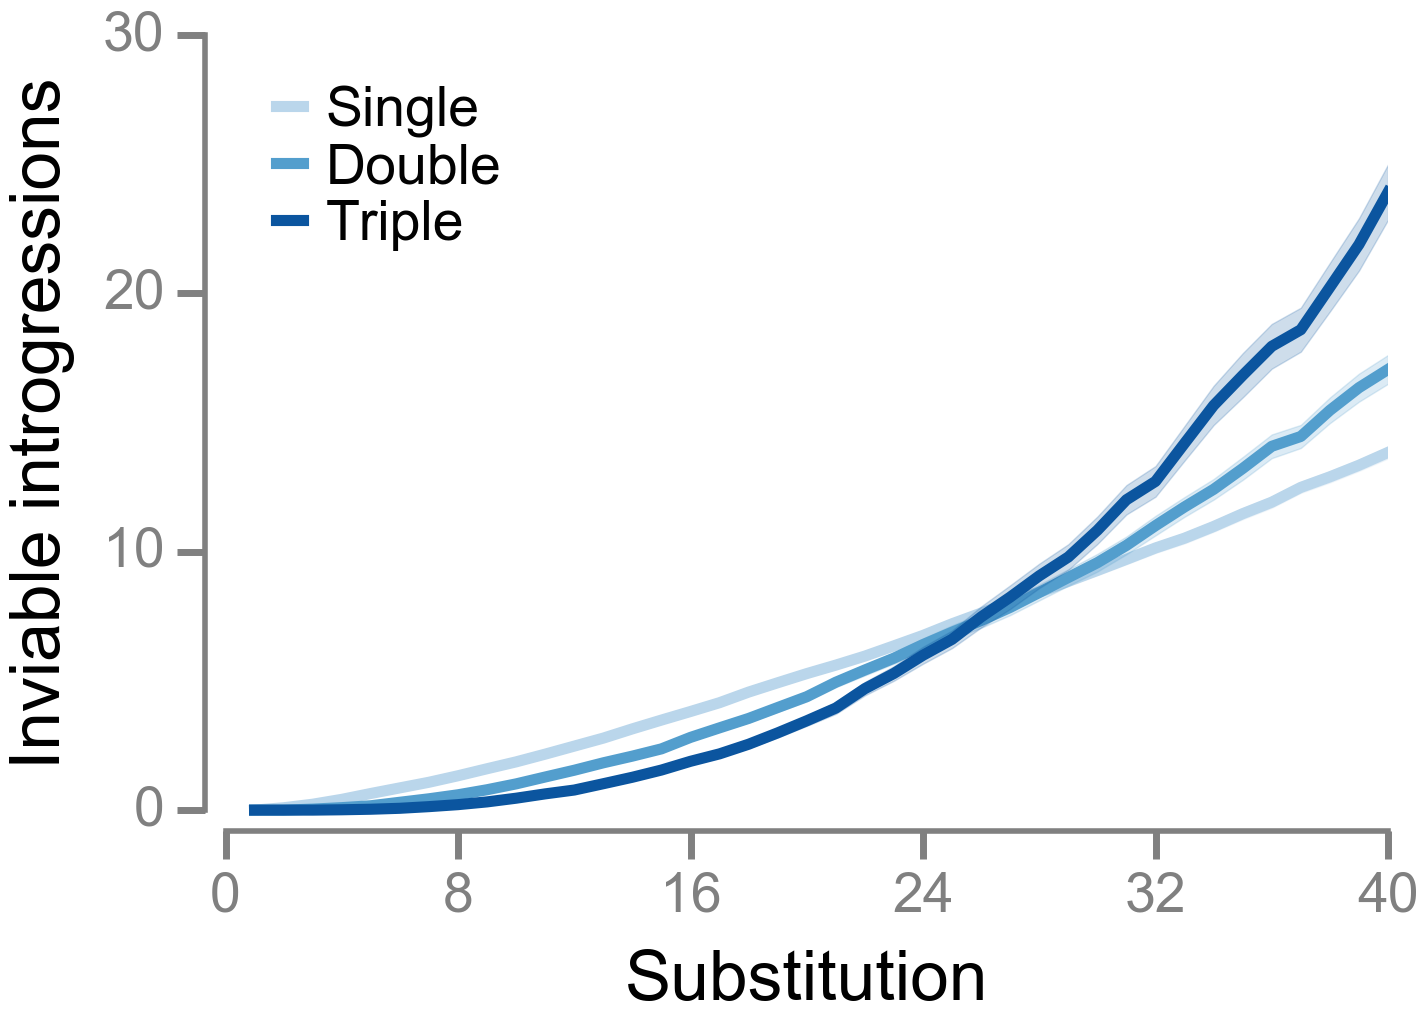

In [9]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col=(0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* single.std()/np.sqrt(len(single))
plt.errorbar(x, single.mean(), linewidth=8, clip_on=False, color=col, zorder=2, label=r'Single')
ax.fill_between(x, single.mean() - err0, single.mean() + err0, alpha=.2, zorder=2, color=col)

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err1=1.96* double.std()/np.sqrt(len(double))
plt.errorbar(x, double.mean(), linewidth=8, clip_on=False, color=col, zorder=3, label=r'Double')
ax.fill_between(x, double.mean() - err1, double.mean() + err1, alpha=.2, zorder=3, color= col)

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err2=1.96* triple.std()/np.sqrt(len(triple))
plt.errorbar(x, triple.mean(), linewidth=8, clip_on=False, color=col, zorder=4, label=r'Triple')
ax.fill_between(x, triple.mean() - err2, triple.mean() + err2, alpha=.2, zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)


rect = patches.Rectangle((40,1),1,24,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

## Table 1

#### Single ($i = 1$)

In [160]:
y = np.array(single.mean())

In [162]:
x = np.arange(1, 41, 1)

In [163]:
%%R -i x -i y
mel = nls(y ~ a * (x - 1)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 1)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0981903  0.0008753   112.2   <2e-16 ***
b 1.3506579  0.0026090   517.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0324 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 1.191e-06



In [168]:
norm = %R qt(.975, 38)

$a$ 95% CI and $b$ 95% CI

In [170]:
0.0008753*norm[0], 0.0026090*norm[0]

(0.0017719522116721466, 0.0052816443736463286)

In [171]:
yy = np.array([0.0981903*(i - 1)**1.3506579 for i in x])

In [174]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9999456


#### Double ($i = 2$)

In [178]:
y = np.array(double.mean())[1:]
x = np.arange(2, 41, 1)

In [179]:
%%R -i x -i y
mel = nls(y ~ a * (x - 2)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 2)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0229249  0.0006294   36.42   <2e-16 ***
b 1.8169726  0.0079781  227.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08637 on 37 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 8.068e-06



$a$ 95% CI and $b$ 95% CI

In [180]:
0.0006294*norm[0], 0.0079781*norm[0]

(0.0012741536867661935, 0.016150819079106083)

In [181]:
yy = np.array([0.0229249*(i - 2)**1.8169726 for i in x])

In [182]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.999744


#### Triple ($i = 3$)

In [183]:
y = np.array(triple.mean())[2:]
x = np.arange(3, 41, 1)

In [185]:
%%R -i x -i y
mel = nls(y ~ a * (x - 3)^b, start=list(a=.1, b=.1))
summary(mel)


Formula: y ~ a * (x - 3)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0035604  0.0001979   17.99   <2e-16 ***
b 2.4360026  0.0160738  151.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1679 on 36 degrees of freedom

Number of iterations to convergence: 15 
Achieved convergence tolerance: 4.471e-08



$a$ 95% CI and $b$ 95% CI

In [186]:
0.0001979*norm[0], 0.0160738*norm[0]

(0.00040062760503817876, 0.032539706911888212)

In [187]:
yy = np.array([0.0035604*(i - 3)**2.4360026 for i in x])

In [188]:
%%R -i y -i yy
model = lm(yy ~ y)
summary(model)$r.squared 

[1] 0.9994725


## Figure 3

In [10]:
x = np.arange(1, 41, 1)
y = np.array(single.mean())

In [14]:
%%R -i x -i y
mod = nls(y ~ x - ((1 - (1 - a)^x)/a), start=list(a=.1))
summary(mod)


Formula: y ~ x - ((1 - (1 - a)^x)/a)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0263710  0.0005495   47.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7284 on 39 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 1.035e-07



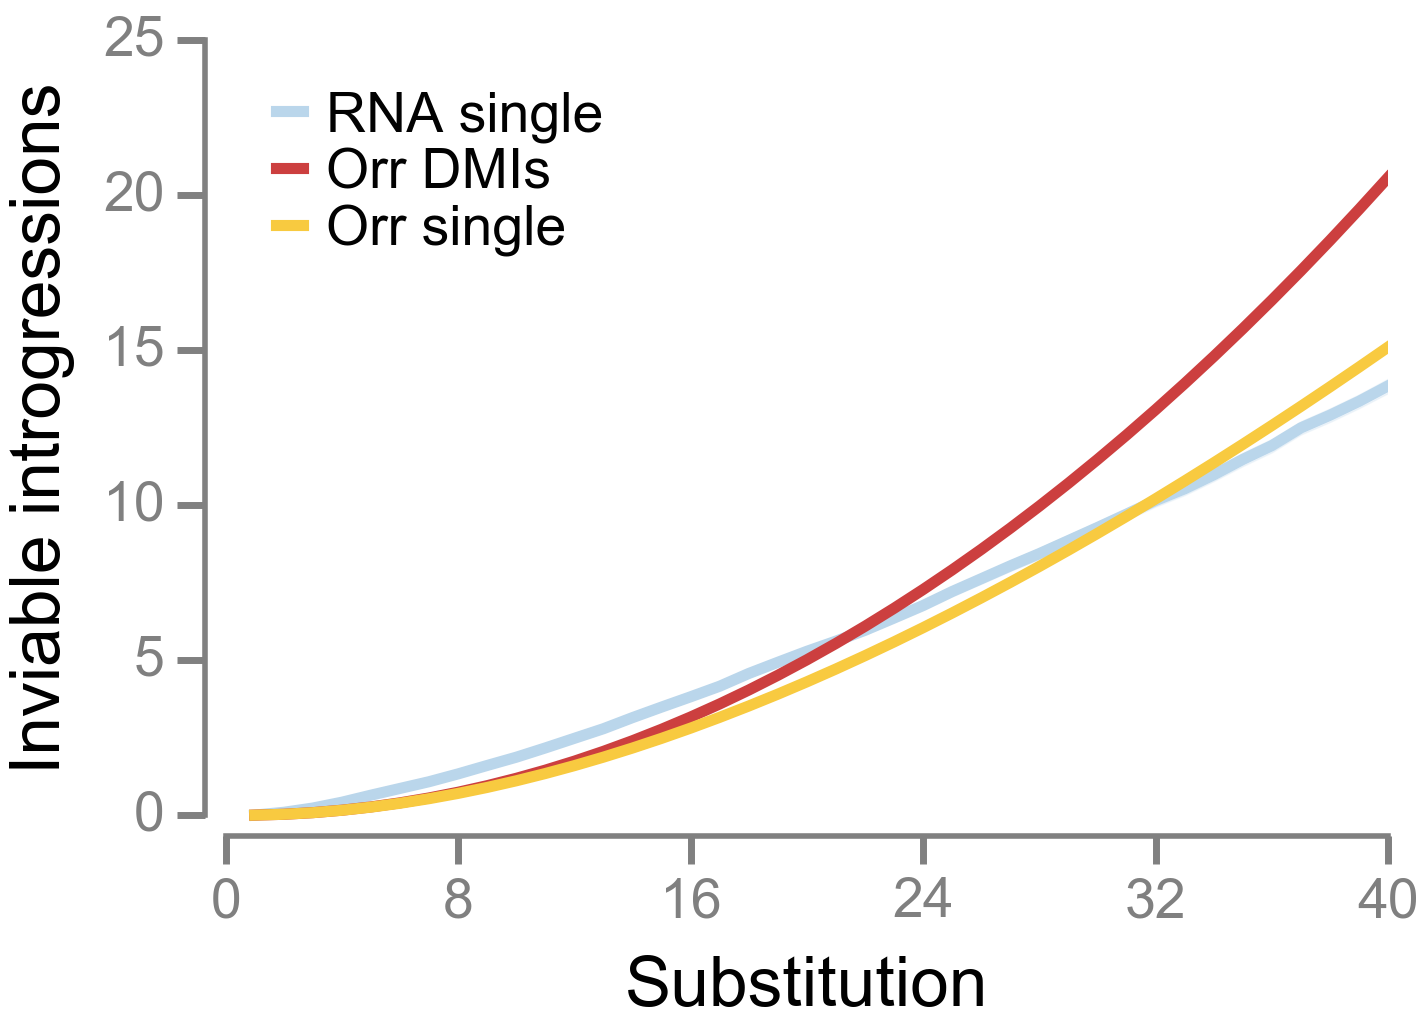

In [14]:
def new_ricardo_eq(k,p):
    return k - ((1. - (1. - p)**k)/float(p))

def Orr(k,p):
    return p * k * (k - 1)/2

x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col=(0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* single.std()/np.sqrt(len(single))
plt.errorbar(x, single.mean(), linewidth=8, clip_on=False, color=col, zorder=1, label=r'RNA single')
ax.fill_between(x, single.mean() - err0, single.mean() + err0, alpha=.2, zorder=1, color=col)

plt.errorbar(x, [Orr(i, 0.0263710) for i in x], linewidth=8, clip_on=False, color='#CC3F3F', zorder=2, label='Orr DMIs')

plt.errorbar(x, [new_ricardo_eq(i, 0.0263710) for i in x], linewidth=8, clip_on=False, color='#F8CA40', zorder=3, label='Orr single')

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1., markerscale=1)


rect = patches.Rectangle((40,1),1,25,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)

# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

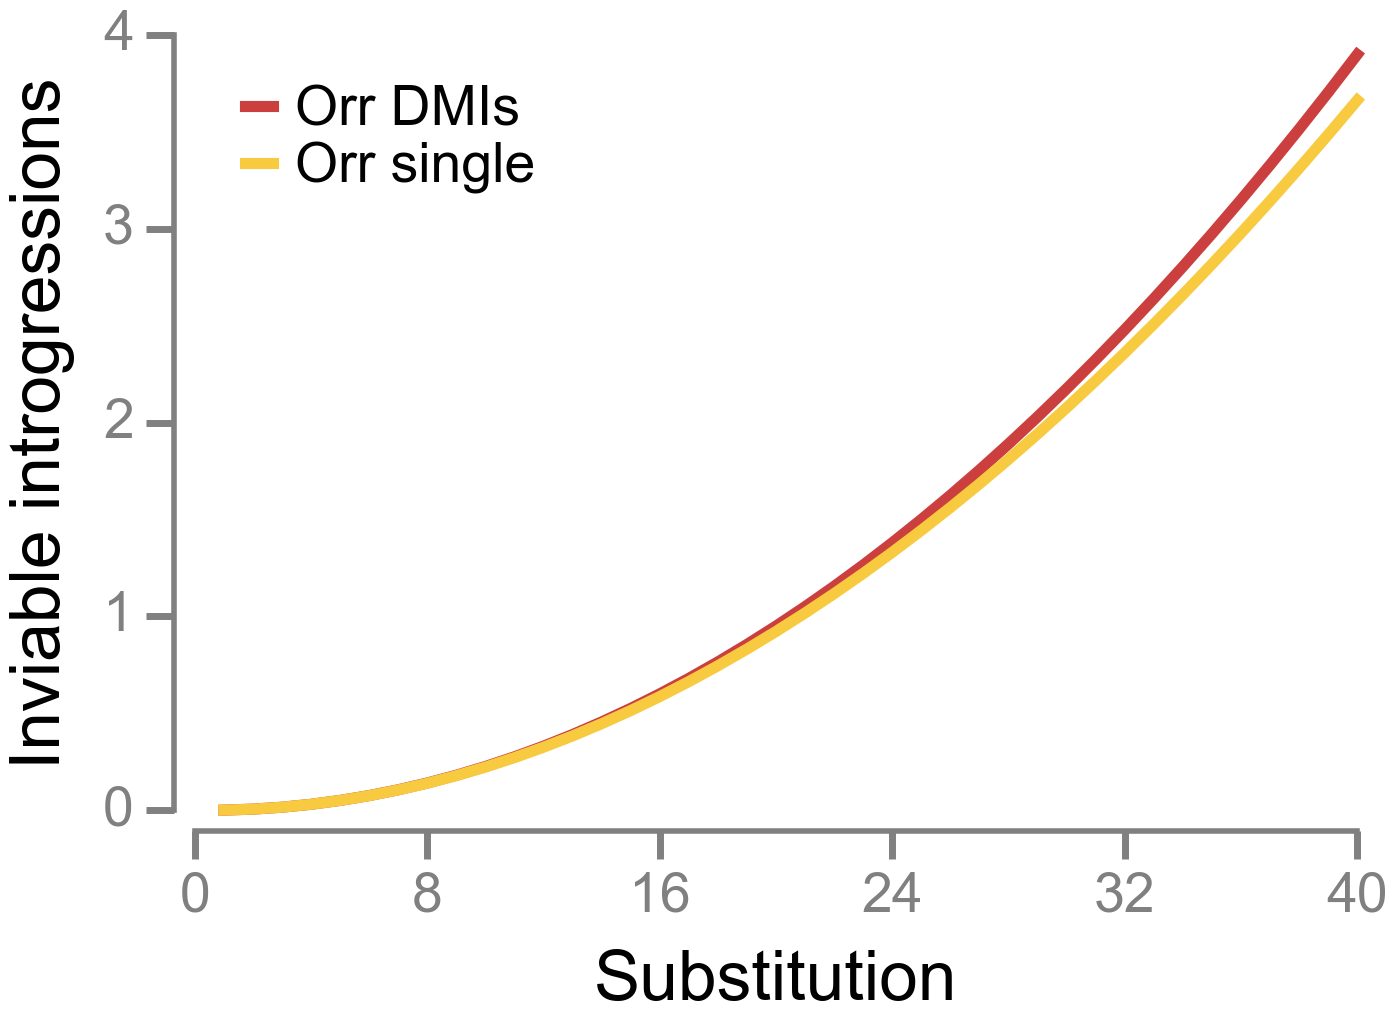

In [15]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

p = 0.005

plt.errorbar(x, [Orr(i, p) for i in x], linewidth=8, clip_on=False, color='#CC3F3F', zorder=2, label='Orr DMIs')

plt.errorbar(x, [new_ricardo_eq(i, p) for i in x], linewidth=8, clip_on=False, color='#F8CA40', zorder=3, label='Orr single')

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 4, 5))
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1., markerscale=1)


rect = patches.Rectangle((40,1),1,25,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)

# Add the patch to the Axes
#ax.add_patch(rect)
plt.show()

## Figure 5

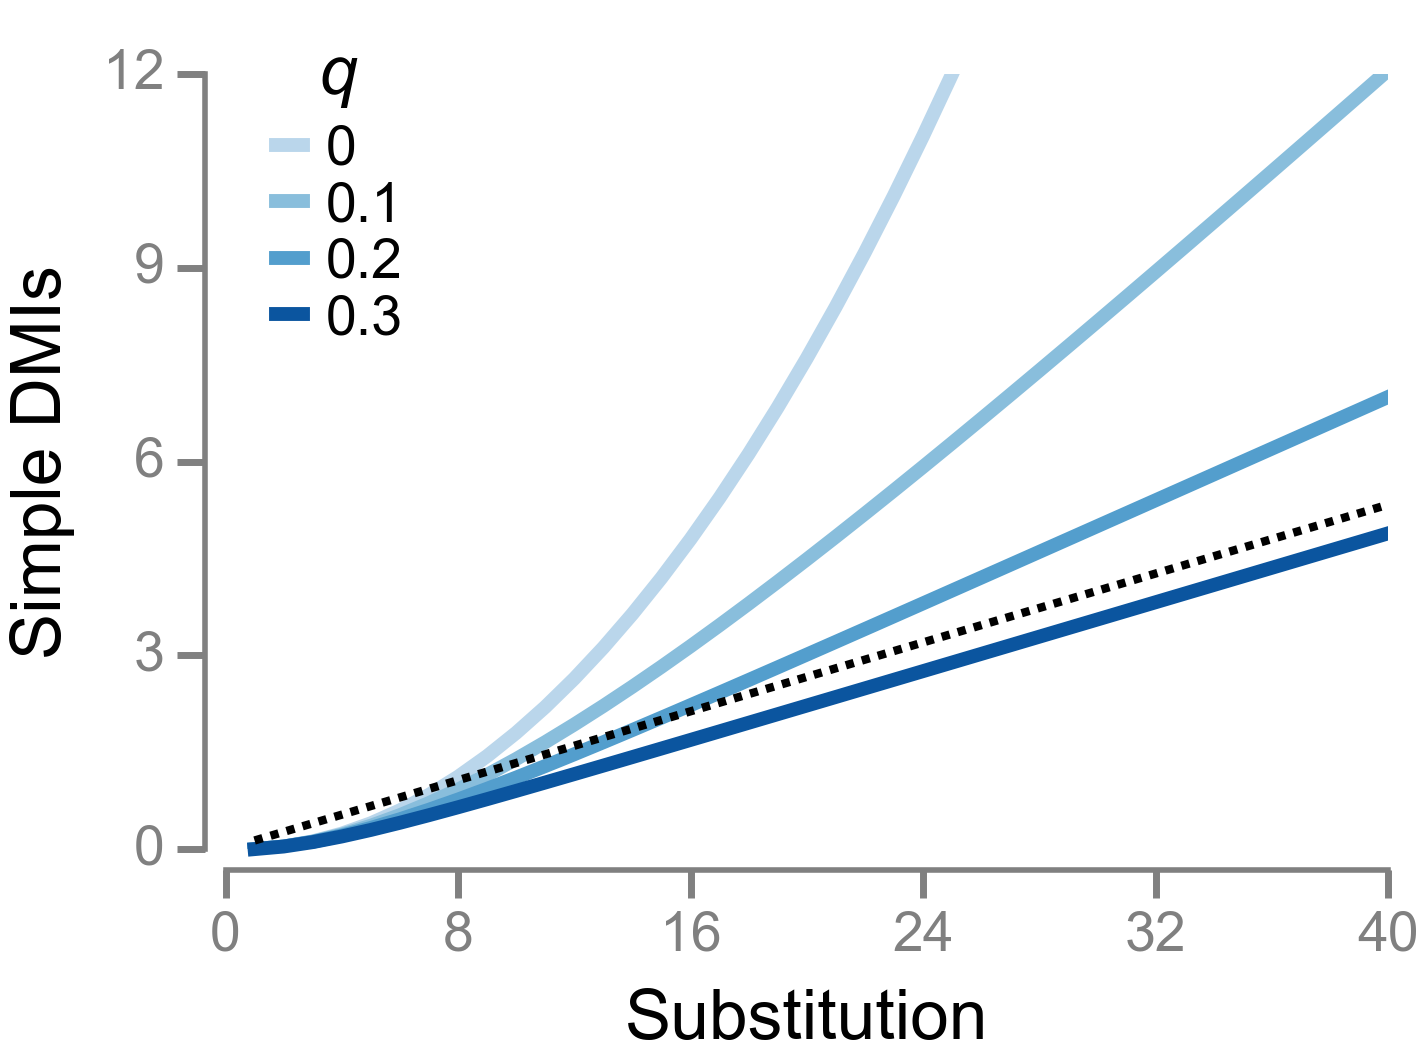

In [194]:
def melting(k, p, q):
    return p * ((1 - q) ** k + k * q - 1) / q ** 2

def snow(k, p):
    return p * (k * (k - 1))/2.

x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))
col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
plt.plot(x, [snow(i, 0.04) for i in x], color=col, linewidth=10, clip_on=True, label=r'0')

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
plt.plot(x, [melting(i, 0.04, 0.1) for i in x], color= col, linewidth=10, clip_on=True, label=r'0.1')

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
plt.plot(x, [melting(i, 0.04, 0.2) for i in x], color= col, linewidth=10, clip_on=True, label=r'0.2')

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
plt.plot(x, [melting(i, 0.04, 0.3) for i in x],\
         color=col, linewidth=10, clip_on=False, label=r'0.3')

plt.plot(x, [0.04/0.3*i for i in x], '--',\
         color='black', linewidth=6, clip_on=False)

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Simple DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 12, 5))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)
plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
plt.ylim(0, 12)

rect = patches.Rectangle((40,1),1,12,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/Figs_Jan14/Fig_diff_q.png', bbox_inches='tight', dpi=300)

## Figure 7

In [31]:
def complexify_single(evo_obj):
    sin_de_novo = []
    sin_from_dou = []
    sin_from_triple = []
    past_dou = []
    past_triple = []
    past_sin_from_dou = []
    past_sin_from_triple = []
    for i,j,k in zip(evo_obj['single'], evo_obj['double'], evo_obj['triple']):
        de_novo = []
        from_dou = []
        from_tri = []
        for l in i:
            test = False
            for m in past_dou:
                if len(set(l).intersection(m)) == 1:
                    from_dou.append(l)
                    test = True
                    break
            if not test:
                for m in past_triple:
                    if len(set(l).intersection(m)) == 1:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if l in past_sin_from_dou:
                    from_dou.append(l)
                elif l in past_sin_from_triple:
                    from_tri.append(l)
                else:
                    de_novo.append(l)
        past_dou = j.keys()
        past_triple = k.keys()
        past_sin_from_dou = from_dou
        past_sin_from_triple = from_tri
        sin_de_novo.append(de_novo)
        sin_from_dou.append(from_dou)
        sin_from_triple.append(from_tri)
    return sin_de_novo, sin_from_dou, sin_from_triple 

In [32]:
def complexify_single_inv(evo_obj):
    sin_de_novo = []
    sin_from_dou = []
    sin_from_triple = []
    past_dou = []
    past_triple = []
    past_sin_from_dou = []
    past_sin_from_triple = []
    for i,j,k in zip(evo_obj['single_inv'], evo_obj['double_inv'], evo_obj['triple_inv']):
        de_novo = []
        from_dou = []
        from_tri = []
        for l in i:
            test = False
            for m in past_dou:
                if len(set(l).intersection(m)) == 1:
                    from_dou.append(l)
                    test = True
                    break
            if not test:
                for m in past_triple:
                    if len(set(l).intersection(m)) == 1:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if l in past_sin_from_dou:
                    from_dou.append(l)
                elif l in past_sin_from_triple:
                    from_tri.append(l)
                else:
                    de_novo.append(l)
        past_dou = j.keys()
        past_triple = k.keys()
        past_sin_from_dou = from_dou
        past_sin_from_triple = from_tri
        sin_de_novo.append(de_novo)
        sin_from_dou.append(from_dou)
        sin_from_triple.append(from_tri)
    return sin_de_novo, sin_from_dou, sin_from_triple 

In [22]:
def complexify_double(evo_obj):
    double_de_novo = []
    double_sin = []
    double_tri = []
    past_sin = [] # single DMIs from one gen before.
    past_tri = []
    past_from_tri = []
    past_from_sin = [] # doubles categorized as having been originated form single in the past gen.
    for i,j,k in zip(evo_obj['single'], evo_obj['double'], evo_obj['triple']):
        de_novo = [] # the de novo doubles
        from_sin = [] # doubles which where single in the previous generation
        from_tri = []
        for l in j:
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for m in past_tri:
                    if len(set(l).intersection(set(m))) == 2:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if (l not in past_from_sin) and (l not in past_from_tri):
                    de_novo.append(l)
                elif l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_tri:
                    from_tri.append(l)
        past_sin = i.keys()
        past_tri = k.keys()
        past_from_sin =  from_sin
        past_from_tri =  from_tri
        double_de_novo.append(list(set(de_novo)))
        double_sin.append(list(set(from_sin)))
        double_tri.append(list(set(from_tri)))
    return double_de_novo, double_sin, double_tri

In [23]:
def complexify_double_inv(evo_obj):
    double_de_novo = []
    double_sin = []
    double_tri = []
    past_sin = [] # single DMIs from one gen before.
    past_tri = []
    past_from_tri = []
    past_from_sin = [] # doubles categorized as having been originated form single in the past gen.
    for i,j,k in zip(evo_obj['single_inv'], evo_obj['double_inv'], evo_obj['triple_inv']):
        de_novo = [] # the de novo doubles
        from_sin = [] # doubles which where single in the previous generation
        from_tri = []
        for l in j:
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for m in past_tri:
                    if len(set(l).intersection(set(m))) == 2:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if (l not in past_from_sin) and (l not in past_from_tri):
                    de_novo.append(l)
                elif l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_tri:
                    from_tri.append(l)
        past_sin = i.keys()
        past_tri = k.keys()
        past_from_sin =  from_sin
        past_from_tri =  from_tri
        double_de_novo.append(list(set(de_novo)))
        double_sin.append(list(set(from_sin)))
        double_tri.append(list(set(from_tri)))
    return double_de_novo, double_sin, double_tri

In [26]:
def complexify_triple(evo_obj):
    triple_de_novo = []
    triple_sin = []
    triple_dou = []
    past_sin = []
    past_dou = []
    past_from_sin = []
    past_from_dou = []
    for i,j,k in zip(evo_obj['triple'], evo_obj['double'], evo_obj['single']):
        de_novo = []
        from_sin = []
        from_dou = []
        for l in i.keys():
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for n in past_dou:
                    if len(set(l).intersection(set(n))) == 2:
                        from_dou.append(l)
                        test = True
                        break
            if not test:
                if l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_dou:
                    from_dou.append(l)
                else:
                    de_novo.append(l)
        past_sin = k.keys()
        past_dou = j.keys()
        past_from_sin = from_sin
        past_from_dou = from_dou
        triple_de_novo.append(de_novo)
        triple_sin.append(from_sin)
        triple_dou.append(from_dou)
    return triple_de_novo, triple_sin, triple_dou

In [27]:
def complexify_triple_inv(evo_obj):
    triple_de_novo = []
    triple_sin = []
    triple_dou = []
    past_sin = []
    past_dou = []
    past_from_sin = []
    past_from_dou = []
    for i,j,k in zip(evo_obj['triple_inv'], evo_obj['double_inv'], evo_obj['single_inv']):
        de_novo = []
        from_sin = []
        from_dou = []
        for l in i.keys():
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for n in past_dou:
                    if len(set(l).intersection(set(n))) == 2:
                        from_dou.append(l)
                        test = True
                        break
            if not test:
                if l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_dou:
                    from_dou.append(l)
                else:
                    de_novo.append(l)
        past_sin = k.keys()
        past_dou = j.keys()
        past_from_sin = from_sin
        past_from_dou = from_dou
        triple_de_novo.append(de_novo)
        triple_sin.append(from_sin)
        triple_dou.append(from_dou)
    return triple_de_novo, triple_sin, triple_dou

In [33]:
single_dn = []
single_dou = []
single_tri = []
for i in stat.values():
    a, b, c = complexify_single(i)
    a_n = np.array([len(j) for j in a])
    b_n = np.array([len(j) for j in b])
    c_n = np.array([len(j) for j in c])
    a_inv, b_inv, c_inv = complexify_single_inv(i)
    a_inv_n = np.array([len(j) for j in a_inv])
    b_inv_n = np.array([len(j) for j in b_inv])
    c_inv_n = np.array([len(j) for j in c_inv])
    single_dn.append((a_n + a_inv_n)/ 2.)
    single_dou.append((b_n + b_inv_n)/ 2.)
    single_tri.append((c_n + c_inv_n)/ 2.)
single_dn = pd.DataFrame(single_dn)
single_dou = pd.DataFrame(single_dou)
single_tri = pd.DataFrame(single_tri)

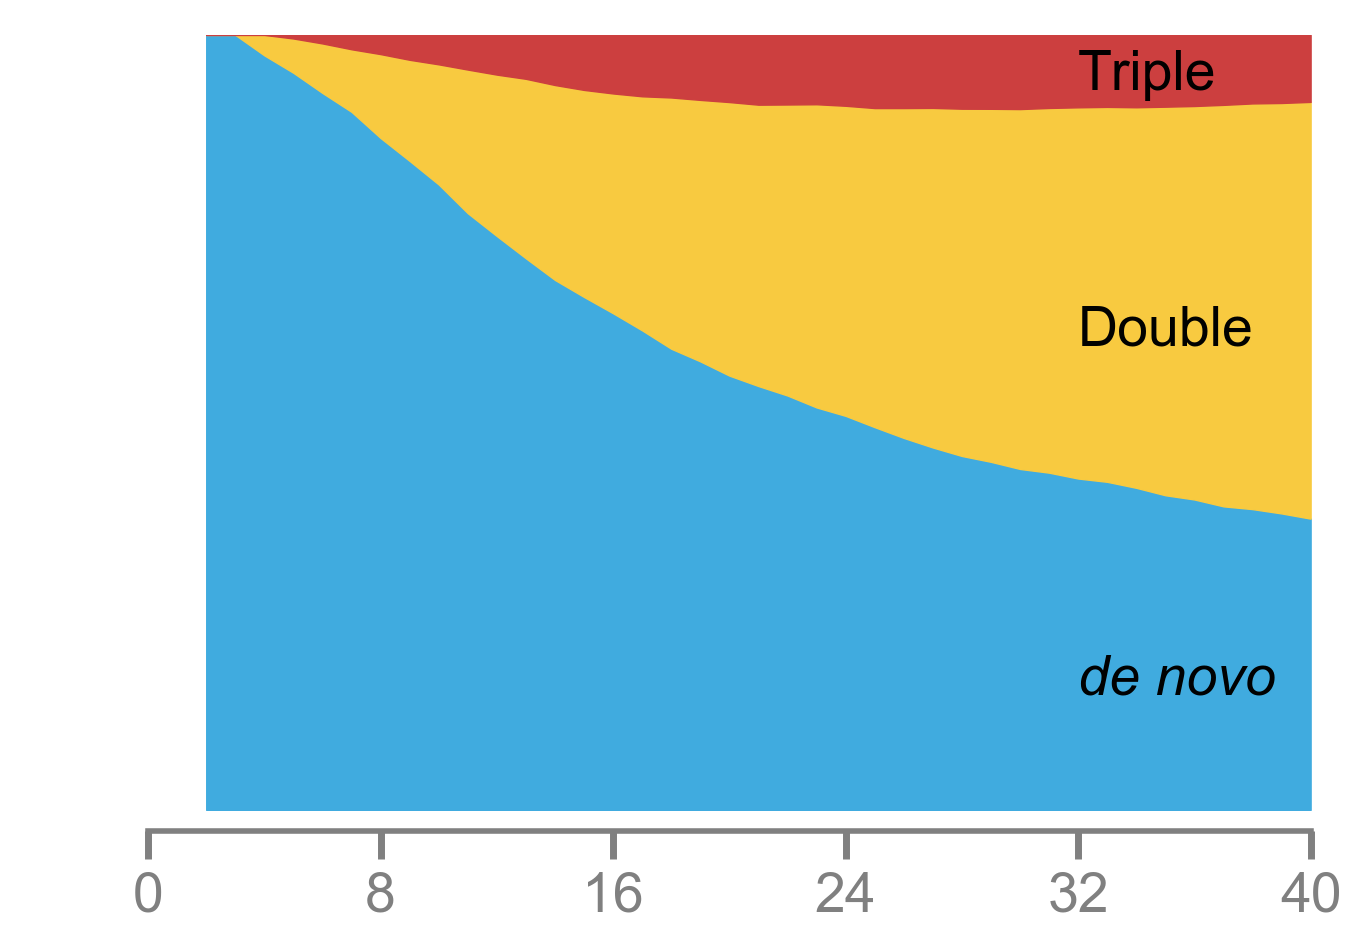

In [35]:
d_tot = np.array(single.mean())[1:]

dn = np.array(single_dn.mean())[1:]
dsin = np.array(single_dou.mean())[1:]
dtri = np.array(single_tri.mean())[1:]

x = np.arange(2, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('white')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

ax.fill_between(x, np.zeros(39), np.divide(dn, d_tot), alpha=1, zorder=4, color='#40ABDF')

ax.fill_between(x, np.divide(dn, d_tot), np.divide(dn, d_tot) + np.divide(dsin, d_tot), alpha=1, zorder=4, color='#F8CA40')

ax.fill_between(x, np.divide(dn, d_tot) + np.divide(dsin, d_tot), np.divide(dn, d_tot) + np.divide(dsin, d_tot) + np.divide(dtri, d_tot), alpha=1, zorder=4, color='#CC3F3F')

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='white')
plt.ylim(0,1)
#plt.xlim(3,40)
#plt.yticks(np.linspace(0, 1, 3), [0, 0.5, 1])
plt.xticks([  0,   8.,  16.,  24.,  32.,  40.], [  0,   8,  16,  24,  32,  40])

plt.text(32,0.15, 'de novo', zorder=5, style='italic')

plt.text(32,0.6, 'Double', zorder=5)#, style='italic')

plt.text(32,0.93, 'Triple', zorder=5)

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper right', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)

#plt.xlim(3,40)
plt.show()

In [24]:
double_dn = []
double_sin = []
double_tri = []
for i in stat.values():
    a, b, c = complexify_double(i)
    a_n = np.array([len(j) for j in a])
    b_n = np.array([len(j) for j in b])
    c_n = np.array([len(j) for j in c])
    a_inv, b_inv, c_inv = complexify_double_inv(i)
    a_inv_n = np.array([len(j) for j in a_inv])
    b_inv_n = np.array([len(j) for j in b_inv])
    c_inv_n = np.array([len(j) for j in c_inv])
    double_dn.append((a_n + a_inv_n)/ 2.)
    double_sin.append((b_n + b_inv_n)/ 2.)
    double_tri.append((c_n + c_inv_n)/ 2.)
double_dn = pd.DataFrame(double_dn)
double_sin = pd.DataFrame(double_sin)
double_tri = pd.DataFrame(double_tri)

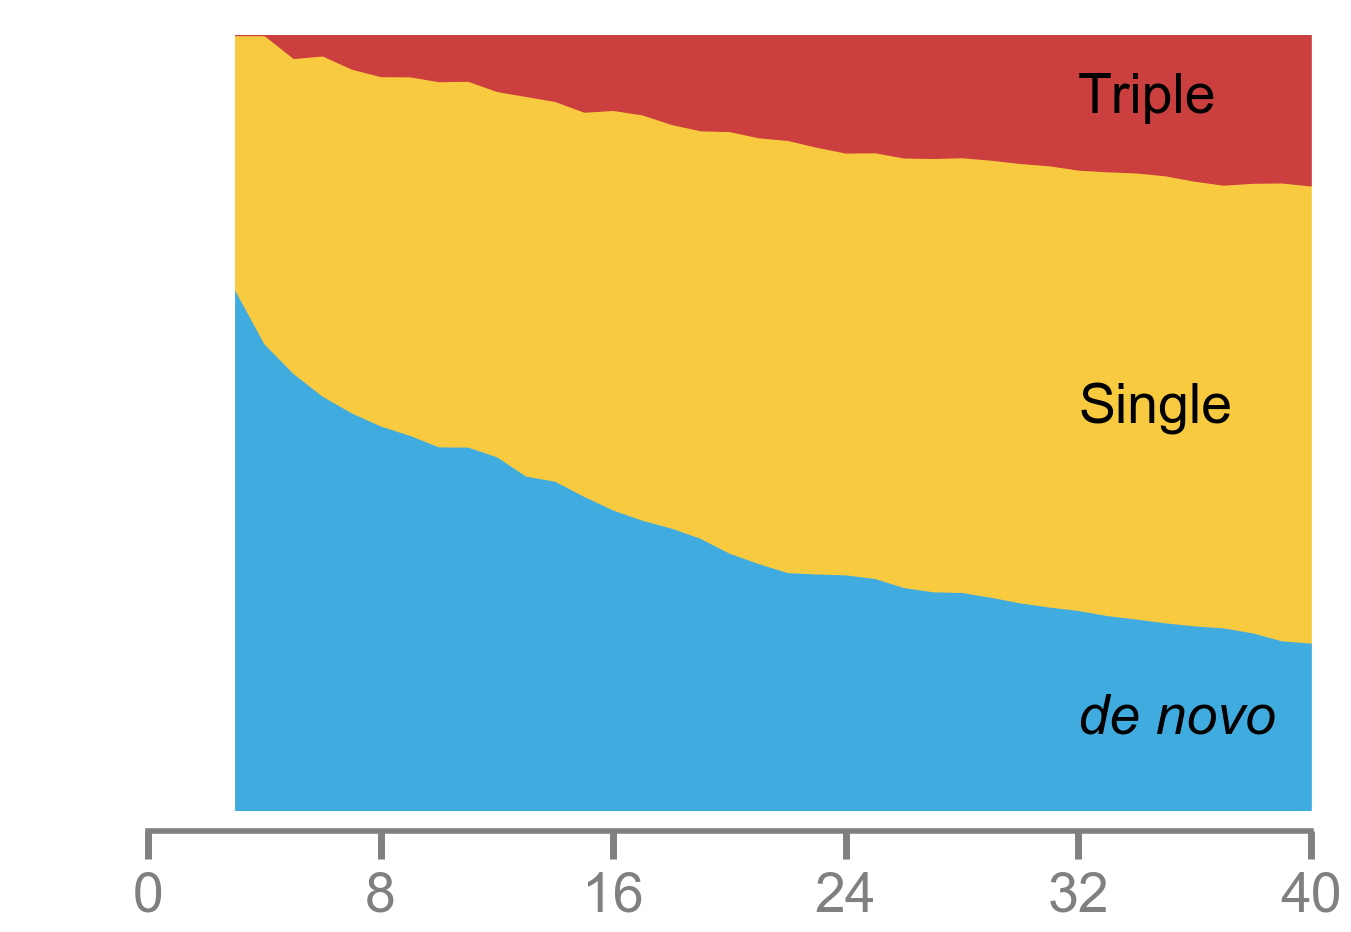

In [25]:
d_tot = np.array(double.mean())[2:]

dn = np.array(double_dn.mean())[2:]
dsin = np.array(double_sin.mean())[2:]
dtri = np.array(double_tri.mean())[2:]

x = np.arange(3, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('white')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

ax.fill_between(x, np.zeros(38), np.divide(dn, d_tot), alpha=1, zorder=4, color='#40ABDF')

ax.fill_between(x, np.divide(dn, d_tot), np.divide(dn, d_tot) + np.divide(dsin, d_tot), alpha=1, zorder=4, color='#F8CA40')

ax.fill_between(x, np.divide(dn, d_tot) + np.divide(dsin, d_tot), np.divide(dn, d_tot) + np.divide(dsin, d_tot) + np.divide(dtri, d_tot), alpha=1, zorder=4, color='#CC3F3F')

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='white')
plt.ylim(0,1)
#plt.xlim(3,40)
plt.yticks(np.linspace(0, 1, 3), [0, 0.5, 1])
plt.xticks([  0,   8.,  16.,  24.,  32.,  40.], [  0,   8,  16,  24,  32,  40])

plt.text(32,0.1, 'de novo', zorder=5, style='italic')

plt.text(32,0.5, 'Single', zorder=5)#, style='italic')

plt.text(32,0.9, 'Triple', zorder=5)

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper right', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)

#plt.xlim(3,40)
plt.show()

In [28]:
triple_dn = []
triple_sin = []
triple_dou = []
for i in stat.values():
    a, b, c = complexify_triple(i)
    a_n = np.array([len(j) for j in a])
    b_n = np.array([len(j) for j in b])
    c_n = np.array([len(j) for j in c])
    a_inv, b_inv, c_inv = complexify_triple_inv(i)
    a_inv_n = np.array([len(j) for j in a_inv])
    b_inv_n = np.array([len(j) for j in b_inv])
    c_inv_n = np.array([len(j) for j in c_inv])
    triple_dn.append((a_n + a_inv_n)/ 2.)
    triple_sin.append((b_n + b_inv_n)/ 2.)
    triple_dou.append((c_n + c_inv_n)/ 2.)
triple_dn = pd.DataFrame(triple_dn)
triple_sin = pd.DataFrame(triple_sin)
triple_dou = pd.DataFrame(triple_dou)

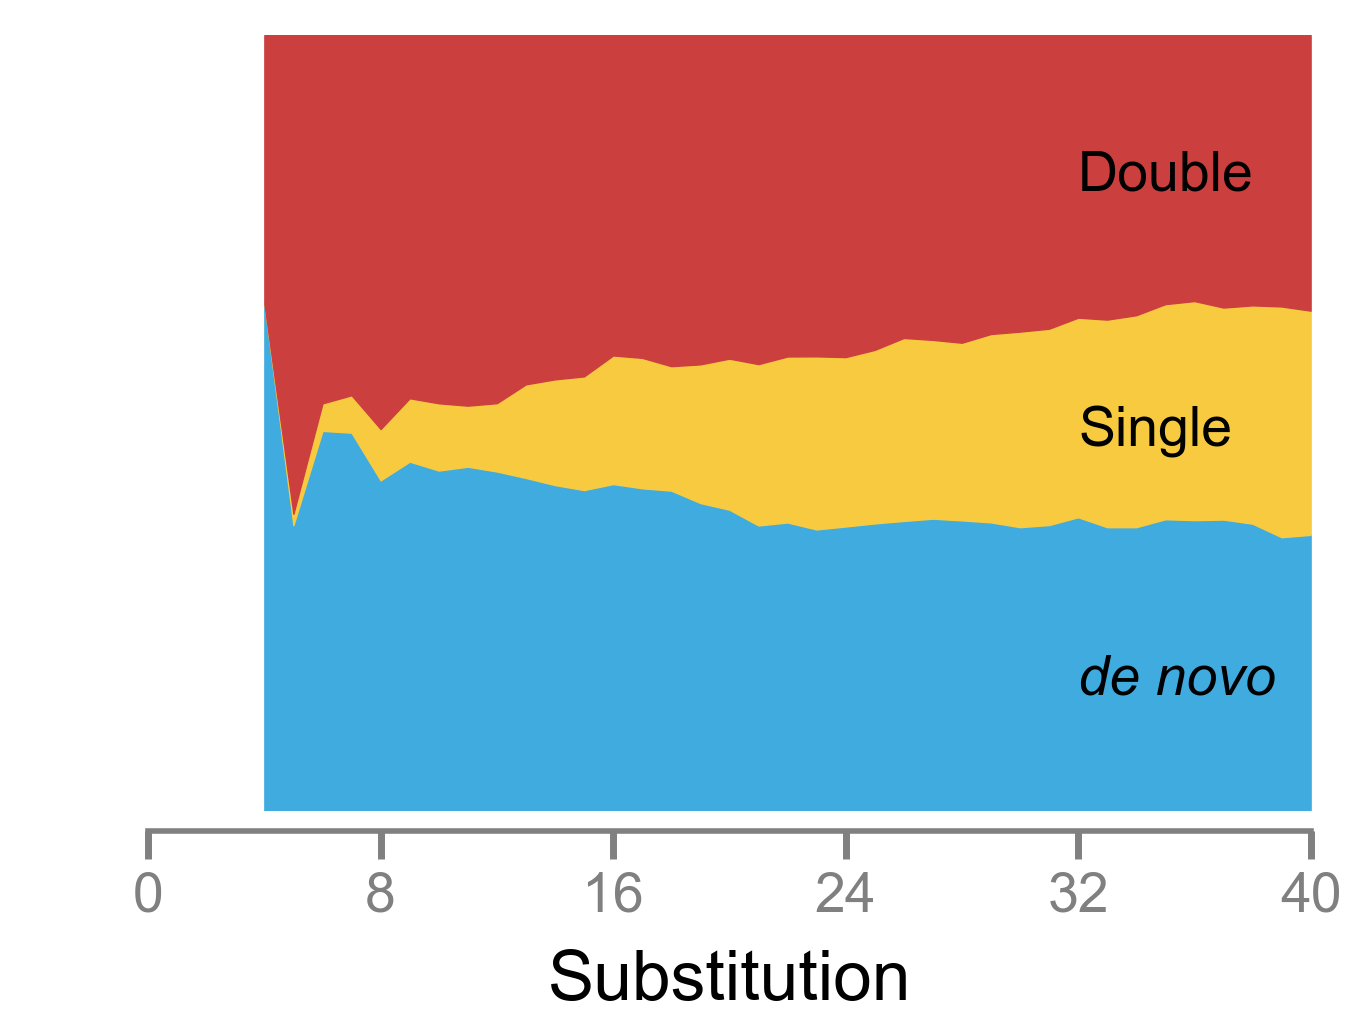

In [36]:
d_tot = np.array(triple.mean())[3:]

dn = np.array(triple_dn.mean())[3:]
dsin = np.array(triple_sin.mean())[3:]
dtri = np.array(triple_dou.mean())[3:]

x = np.arange(4, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('white')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

ax.fill_between(x, np.zeros(37), np.divide(dn, d_tot), alpha=1, zorder=4, color='#40ABDF')

ax.fill_between(x, np.divide(dn, d_tot), np.divide(dn, d_tot) + np.divide(dsin, d_tot), alpha=1, zorder=4, color='#F8CA40')

ax.fill_between(x, np.divide(dn, d_tot) + np.divide(dsin, d_tot), np.divide(dn, d_tot) + np.divide(dsin, d_tot) + np.divide(dtri, d_tot), alpha=1, zorder=4, color='#CC3F3F')

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='white')
plt.ylim(0,1)
#plt.xlim(3,40)
plt.yticks(np.linspace(0, 1, 3), [0, 0.5, 1])
plt.xticks([  0,   8.,  16.,  24.,  32.,  40.], [  0,   8,  16,  24,  32,  40])

plt.text(32,0.15, 'de novo', zorder=5, style='italic')

plt.text(32,0.47, 'Single', zorder=5)#, style='italic')

plt.text(32,0.8, 'Double', zorder=5)

plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)

handles, labels = ax.get_legend_handles_labels()
#handles = [h[0] for h in handles]
ax.legend(handles,labels, loc='upper right', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)

#plt.xlim(3,40)
plt.show()

## Figure 8

In [7]:
RI = []
for i in stat.values():
    RI.append(i['RI'])
RI = pd.DataFrame(RI)

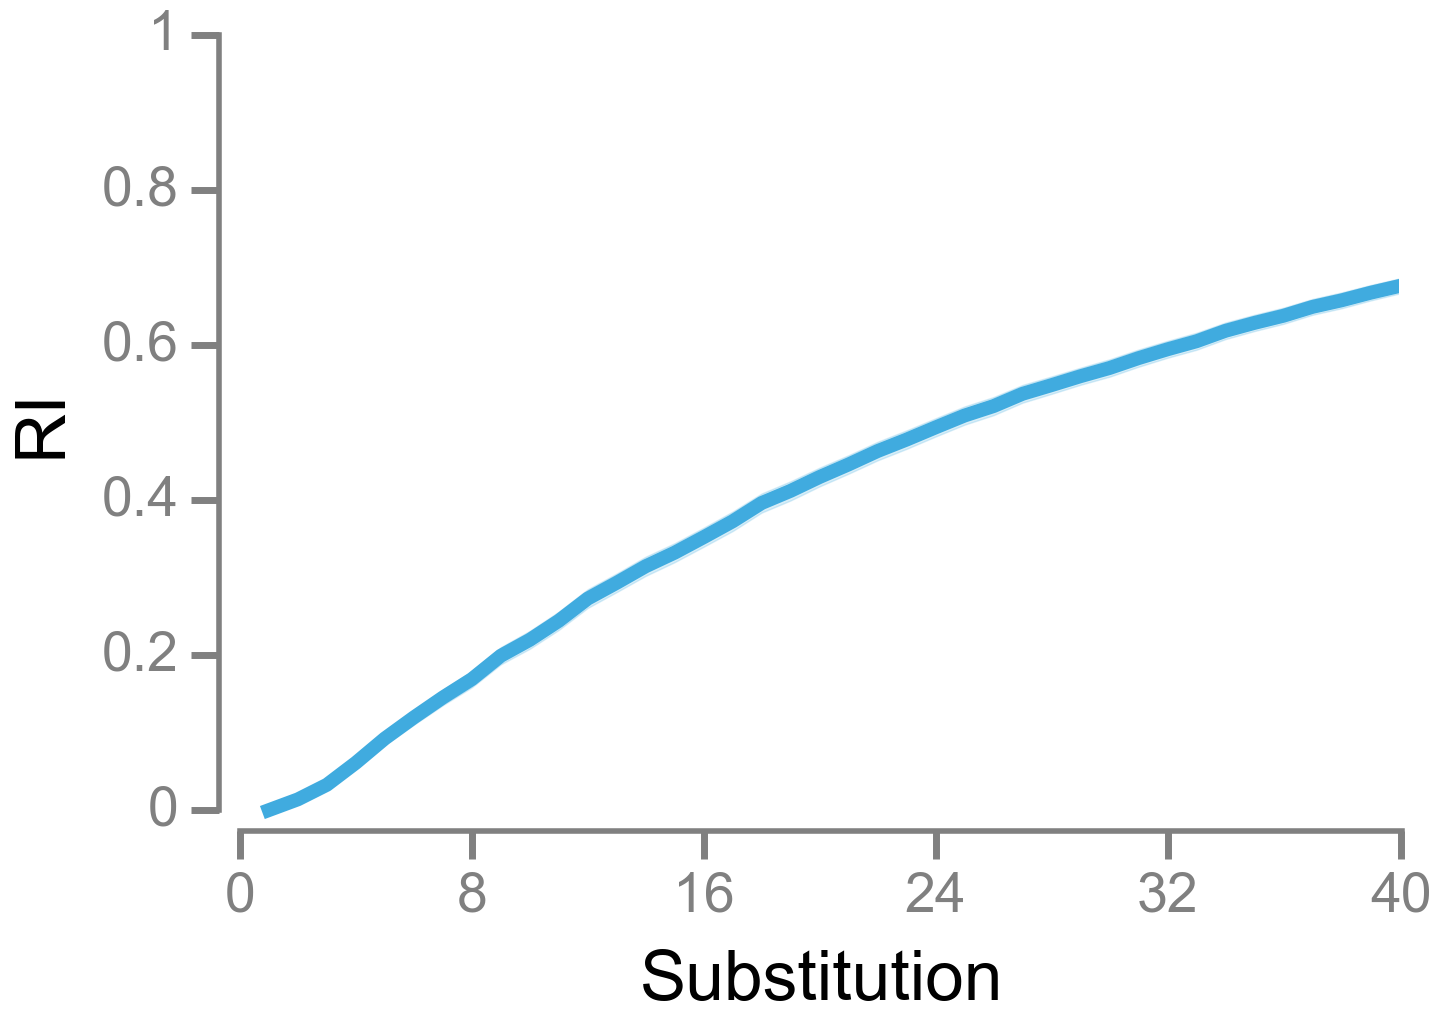

In [13]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

err0= 1.96*RI.std()/np.sqrt(len(RI))
plt.errorbar(x, RI.mean(), linewidth=10, clip_on=False, color='#40ABDF', zorder=1)
ax.fill_between(x, RI.mean() - err0, RI.mean() + err0, alpha=.2, color='#40ABDF', zorder=1)


plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'RI', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 1, 6), [ 0 ,  0.2,  0.4,  0.6,  0.8,  1 ])
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40.06], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)
plt.xlim(0, 40.1)
rect = patches.Rectangle((40,0.1),1,0.8,linewidth=1,edgecolor='none',facecolor='white', zorder=5, clip_on=False)
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

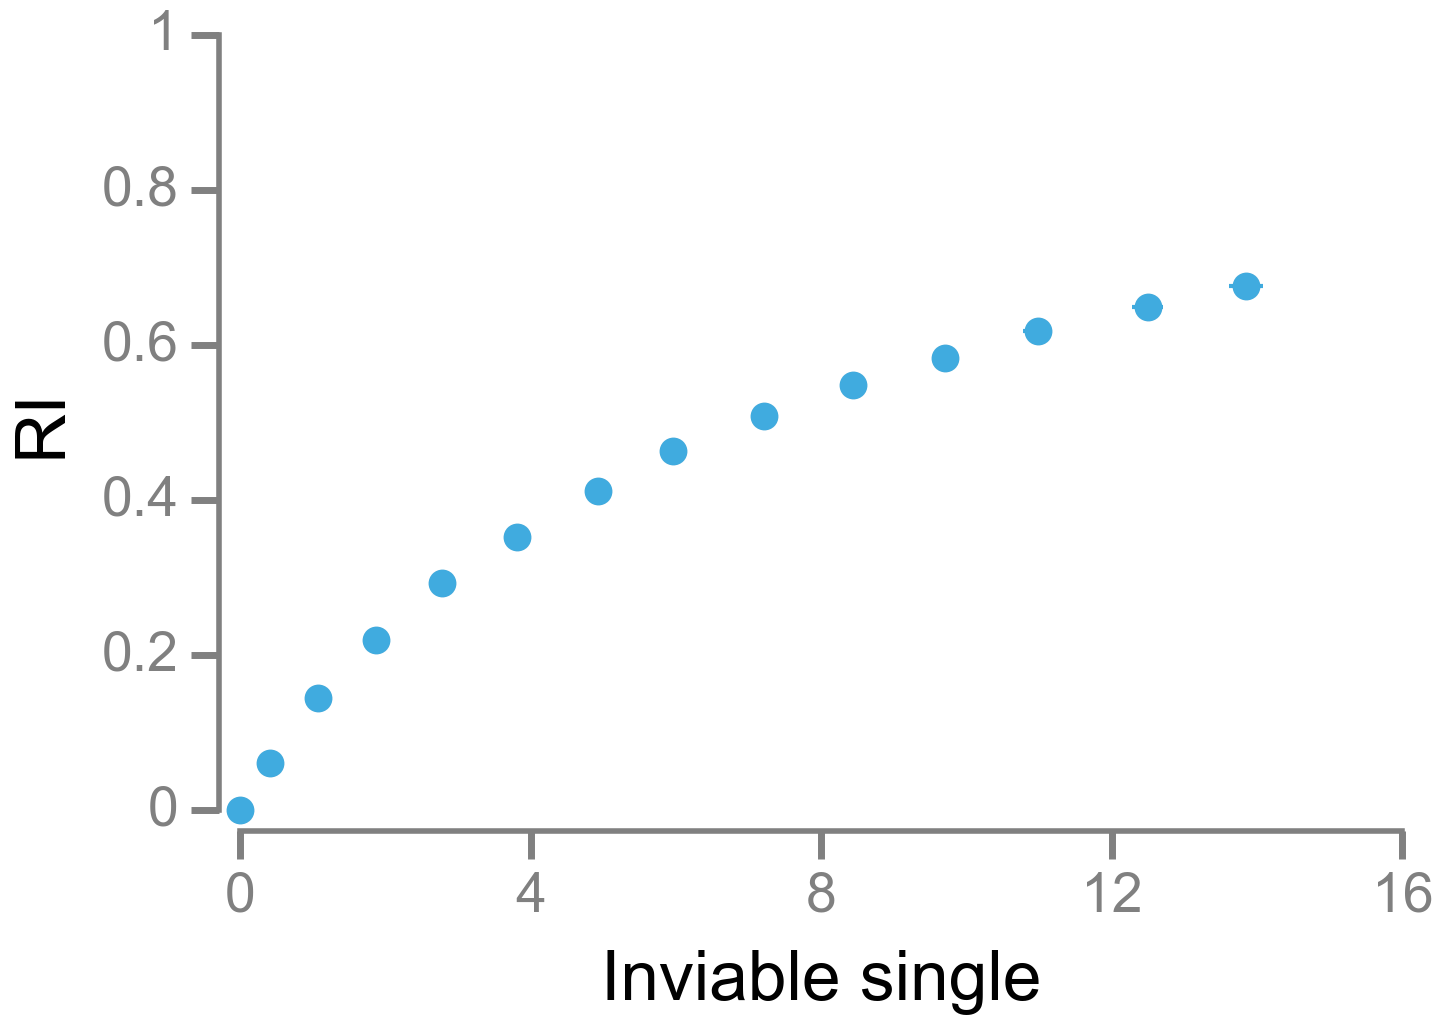

In [10]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

plt.errorbar(single.mean()[::3], RI.mean()[::3], yerr=1.96*RI.std()[::3]/np.sqrt(len(RI)),\
             xerr=1.96*single.std()[::3]/np.sqrt(len(single)),fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=False, \
             ms=20, mew=0.01, elinewidth=3, color='#40ABDF', ecolor='#40ABDF')

plt.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'RI', fontsize= 50, labelpad=20)
plt.xlabel(r'Inviable single', fontsize= 50, labelpad=20)

plt.yticks(np.linspace(0, 1, 6), [ 0 ,  0.2,  0.4,  0.6,  0.8,  1 ])
plt.xticks(np.linspace(0, 16, 5))#, [0, 0.2, 0.4, 0.6, 0.8])
#plt.xticks(np.linspace(0, 15, 4))
#ax.legend(handles, labels, loc='upper right', fontsize='large', framealpha=0, numpoints=1, markerscale=1.0)
#plt.ylim(0, 25)
plt.show()

## Figure 9

In [5]:
import seaborn as sns

In [6]:
data = pd.read_csv('Dataset', )
del data['Unnamed: 0']
data.head()

,ref bp,holeyness,final_single,final_double,final_triple
0,29,0.503231,9.0,24.0,35.5
1,25,0.739809,22.5,6.5,8.5
2,24,0.611972,15.0,9.0,24.5
3,19,0.536040,12.0,13.5,8.0
4,29,0.590969,12.0,11.0,31.0


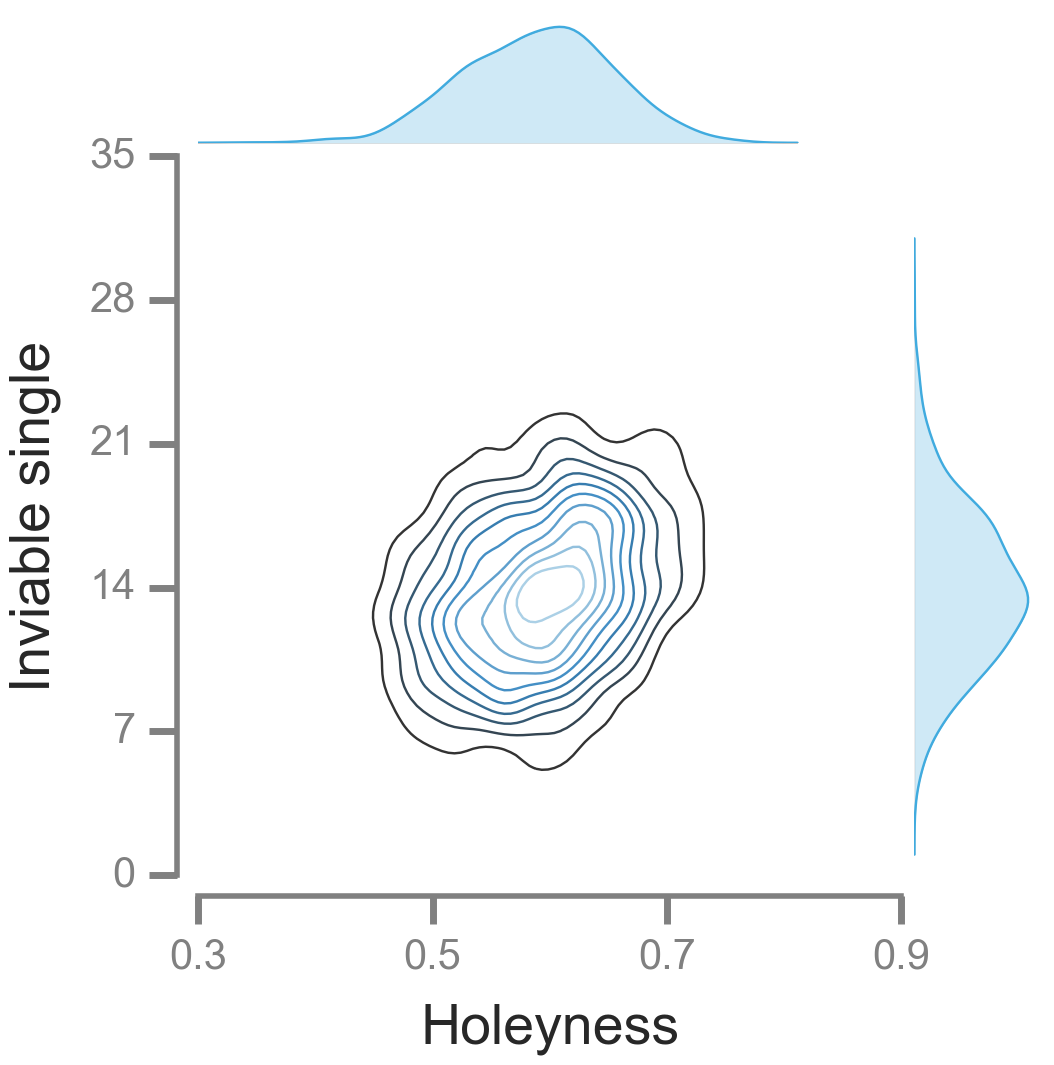

In [7]:
sns.set_context("notebook", font_scale=3)
sns.set_style("ticks", {'axes.linewidth': 4, 'axes.edgecolor': 'grey', 'xtick.major.size': 20, \
                        'ytick.color': 'grey', 'ytick.major.size': 20, 'xtick.color': 'grey'})
#tmp = data[data['alpha']==12]
g = sns.JointGrid(x=data['holeyness'], y=data['final_single'], size=11, space=0.1, xlim=(0.3, 0.9))#, ylim=(0, 0.12))#, ratio=1)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, color='#40ABDF', shade=True)
g.ax_joint.set_xticks(np.linspace(0.3, 0.9, 4))
g.ax_joint.set_yticks(np.linspace(0, 35, 6))
g.ax_joint.set_xlabel('Holeyness', fontdict={'size': 40}, labelpad=20)
g.ax_joint.set_ylabel('Inviable single', fontdict={'size': 40}, labelpad=20)#, style='italic')
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.tick_params(width=5, pad=10)
g.ax_joint.spines['left'].set_position(('outward', 15))
g.ax_joint.spines['bottom'].set_position(('outward', 15))